# Q2.1

1. Use `matplotlib` to show scatterplots of each variable

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from pathlib import Path

In [5]:
data = pd.read_csv('app/data/happiness.csv', delimiter=',', header=0, skip_blank_lines=False)

## Data Cleaning

In [6]:
#Select the quantatitive columns. We are ignoring categorical data for this analysis
cleaned_featureset = data.select_dtypes(include=['int64', 'float64'])

#Remove happiness_rank and happiness_score
cleaned_featureset = cleaned_featureset.drop(columns=['happiness_rank', 'happiness_score'])

#Convert 0's to NAN as there shouldn't be 0's in this dataset unless the value couldn't be calculated
cleaned_featureset = cleaned_featureset.replace(0.0, np.NaN)

#Replace the NA's with mean of column to keep consistent length
cleaned_featureset = cleaned_featureset.apply(lambda x: x.fillna(x.mean()),axis=0)

#Add constant to columns with negative values so that all are positive
cleaned_featureset = cleaned_featureset.apply(
    lambda x: x.sub(x.min()-1) if x.min() < 0 else x)

#Transform columns which have significant outliers and skewed data
#Chose not to remove outliers as their information could still be significant
transform_cube_cols = ['cellular_subscriptions', 'familiy_income_gini_coeff']
transform_log_cols=['military_expenditures[%]', 'population', 'GDP_per_capita[$]', 'inflation_rate[%]']

cleaned_featureset[transform_cube_cols] = cleaned_featureset[
    transform_cube_cols].apply(lambda x: x.transform(np.cbrt))

cleaned_featureset[transform_log_cols] = cleaned_featureset[
    transform_log_cols].apply(lambda x: x.transform(np.log))
cleaned_featureset['surplus_deficit_GDP[%]'] = cleaned_featureset['surplus_deficit_GDP[%]'].pow(3)
#normalize data to fit between 0 and 1
cleaned_featureset = cleaned_featureset.apply(
    lambda x: [(el-x.min())/(x.max()-x.min()) for el in x], axis=0)

#Nooow lets have a look at the sexy data | or not because latex outputs to PDF in ugly way...


In [7]:
cleaned_featureset.describe()

,economy,family,health,freedom,generosity,corruption,dystopia_residual,internet_access_population[%],cellular_subscriptions,surplus_deficit_GDP[%],familiy_income_gini_coeff,GDP_per_capita[$],inflation_rate[%],military_expenditures[%],population
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.524029,0.659147,0.581990,0.616312,0.287860,0.259897,0.537429,0.515665,0.535136,0.530249,0.452631,0.547361,0.244225,0.586071,0.437211
std,0.223575,0.222901,0.246677,0.227456,0.161001,0.219978,0.182521,0.291219,0.131186,0.142984,0.208883,0.233337,0.122817,0.150488,0.182392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.362040,0.543045,0.403429,0.455522,0.176532,0.117416,0.442908,0.246625,0.473620,0.462134,0.311358,0.365468,0.168522,0.494736,0.323214
50%,0.563780,0.706328,0.636147,0.656753,0.270142,0.186104,0.531104,0.532710,0.557240,0.536651,0.467199,0.571198,0.224300,0.593301,0.422861
75%,0.700919,0.838400,0.760061,0.779733,0.378782,0.323770,0.644897,0.771028,0.607304,0.616325,0.586545,0.735346,0.288116,0.660421,0.554533
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that some of this data is still slightly skewed but the standardisation and transformation has done a pretty effective job. 

In [8]:
#Adding the happiness score back into the featureset.
cleaned_featureset.insert(0, 'happiness_score', data['happiness_score'])

# Summary of Scatterplots
The data from many of these scatterplots have already been normalized. Many of them reflect the contribution this study found in the variable's effect on the happiness score. The greater the score, the greater the effect on the survey respondents effect of happiness. 

## Economy

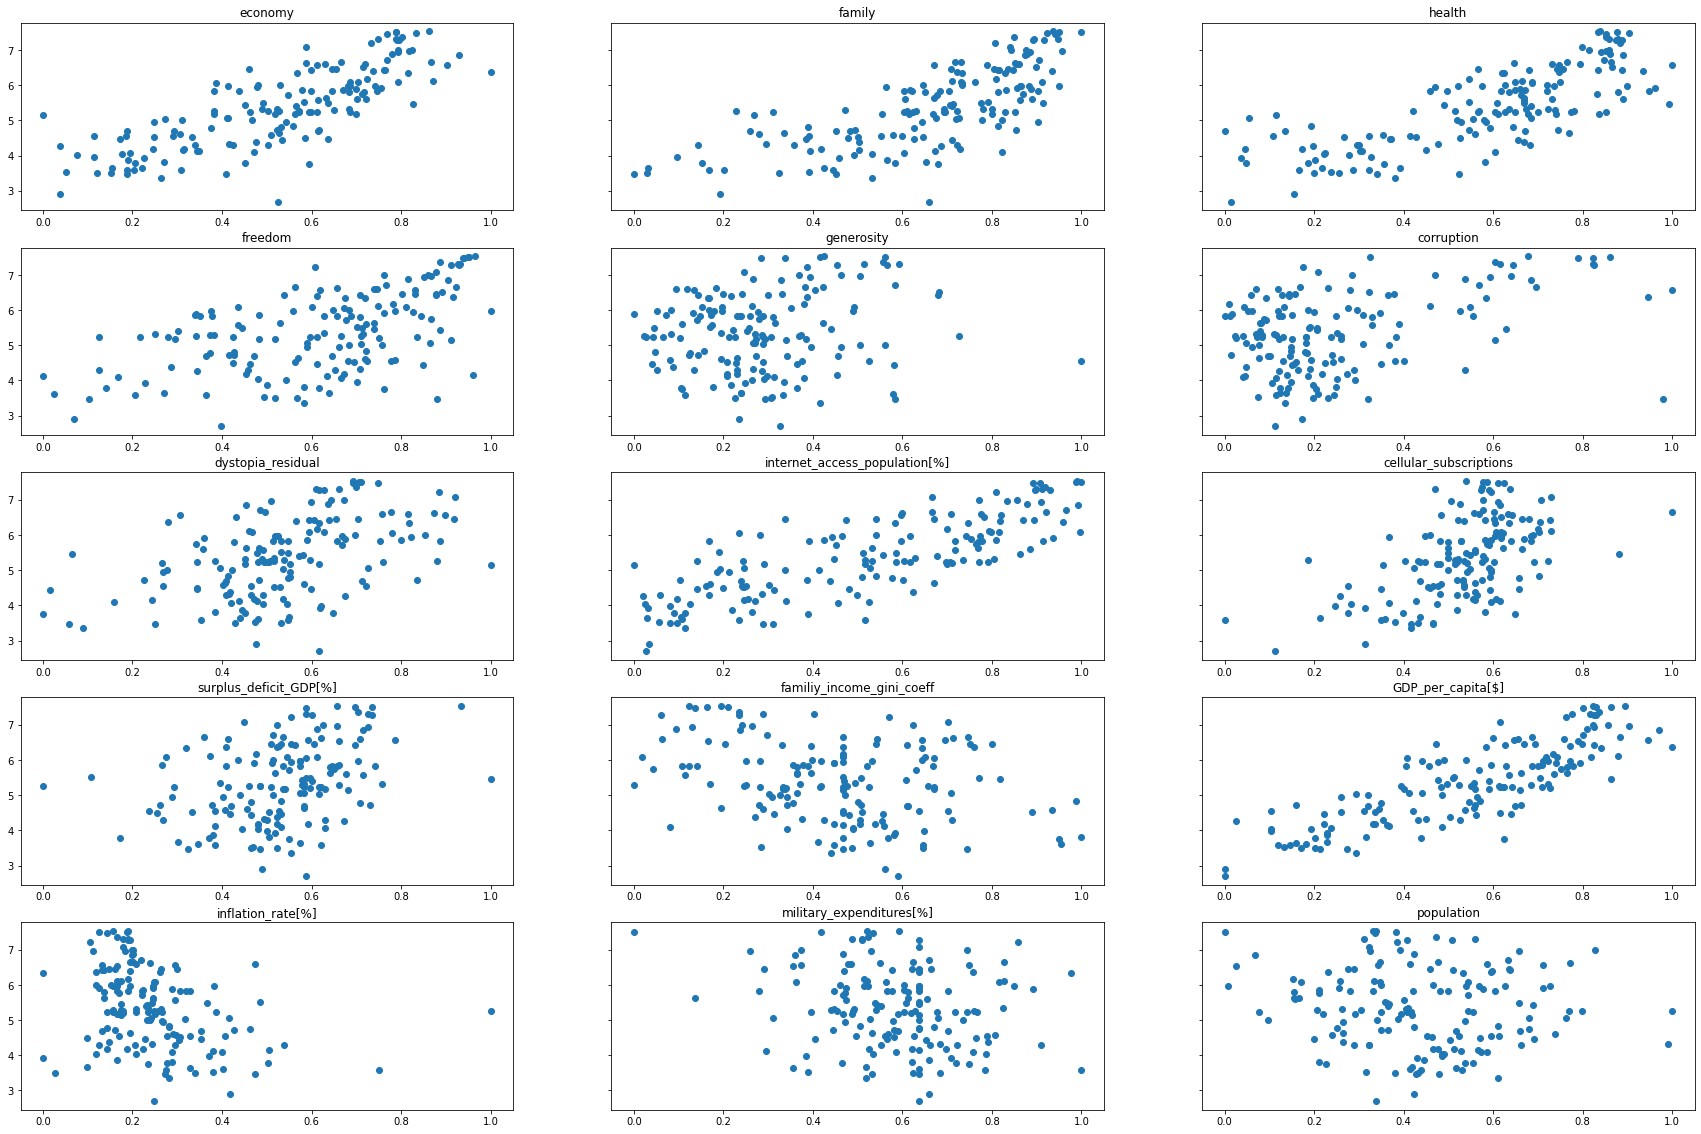

In [9]:
plot_w = 3
plot_h = 5
fig, ax = plt.subplots(plot_h, plot_w, sharey="row")
fig.set_figheight(20)
fig.set_figwidth(30)
for i in range(plot_h):
    for j in range(plot_w):
        feature = cleaned_featureset.columns[1+i*(plot_w)+j]
        ax[i,j].scatter(cleaned_featureset[feature], cleaned_featureset['happiness_score'])
        ax[i,j].set_title(feature)
plt.show()

## Summary
We can see a range of correlations between features in our dataset and our happiness score. The model will use those deemed as most significant. The strongest features economy, family, health, GDP_per_capita and internet access population.
There is a weaker correlation with the happiness score and inflation rate, cellular subscriptions and dystopia residual however it may be enough to improve our model, with an appropriate weighting assigned by the algorithm.

It would seem intuitive that economy, family and health are all signficant as a thriving economy, people with family and a sense of belonging and a healthly state of being could improve a sense of happiness. A strong GDP per capita might keep people busy and an economy productive and internet access enable people to be connected to others as well as information. Counter to this, economic prosperity and higher GDP oer capita could result in higher levels of stressand higher suicide rates etc, High numbers of family could be due to high mortality in children, or requirements of support in farming (in third world countries) and internet can be used to spread disinformation and control populations. It is important to note that these studies are observational, surveys which are littered with personal bias. The factors for many of these variables are also abstracted and give us little insight into how they were calculated/weighted.

# Q2.2

Load data and set up packages

In [10]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics

## Linear model

In [11]:
#This is the featureset that I am choosing to use.
featureset_keys = ['economy', 'family', 'health', 
                   'freedom', 'dystopia_residual', 
                   'internet_access_population[%]', 
                   'cellular_subscriptions', 'GDP_per_capita[$]', 
                   'inflation_rate[%]'
                  ]
featureset = cleaned_featureset[featureset_keys]


happiness_score                  1.000000
GDP_per_capita[$]                0.827745
internet_access_population[%]    0.791302
economy                          0.790772
health                           0.774999
family                           0.731254
freedom                          0.559334
cellular_subscriptions           0.543330
dystopia_residual                0.475355
corruption                       0.429942
surplus_deficit_GDP[%]           0.369192
generosity                       0.155627
population                      -0.101482
military_expenditures[%]        -0.199913
familiy_income_gini_coeff       -0.316759
inflation_rate[%]               -0.330411
Name: happiness_score, dtype: float64

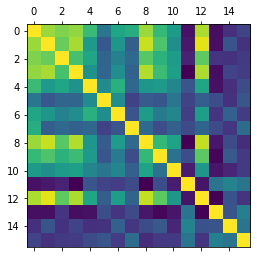

In [12]:
#Showing a correlation matrix from the featureset against the happiness score.
plt.matshow(cleaned_featureset.corr())
cleaned_featureset.corr()['happiness_score'].sort_values(ascending=False)


In [13]:
import pickle

<module 'matplotlib.pyplot' from '/home/higgssr/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

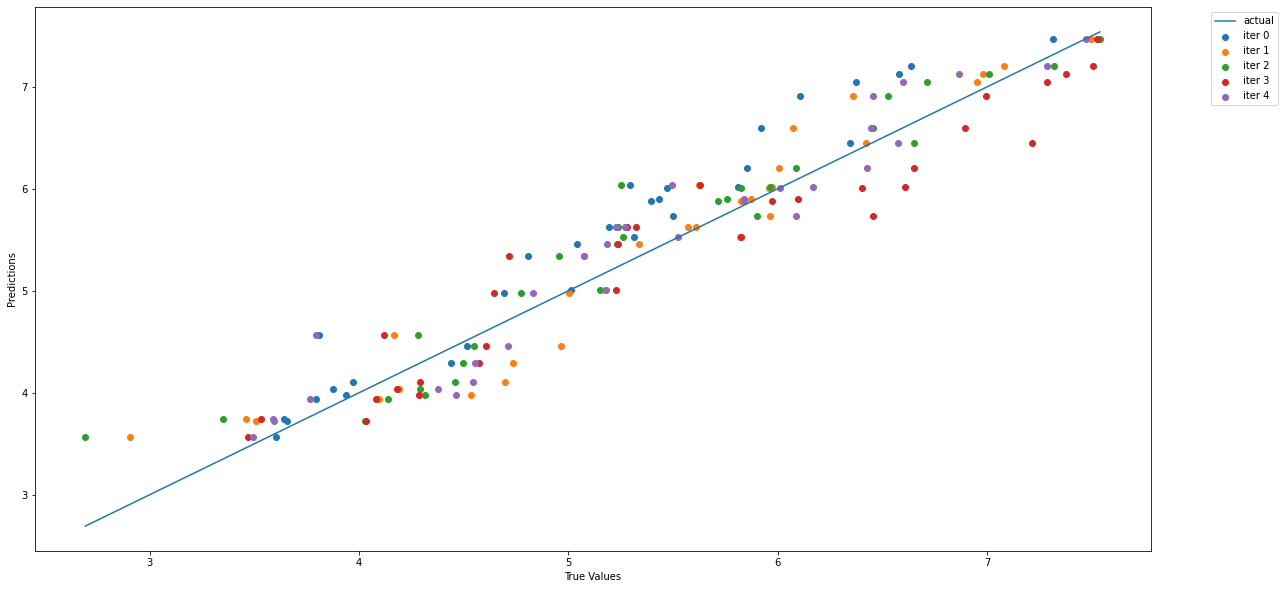

In [61]:
#KERNEL RIDGE LINEAR REGRESSION
def train_model(df, featureset_keys, kernel="linear", alpha=1.0, gamma=None, degree=None, coef0=None):

    # Setup Parameters for Model
    kr_args = {"kernel": kernel, "alpha": alpha}

    # Validate parameters for polynomial
    if kernel == "polynomial":
        if degree is None or coef0 is None:
            print("Must provide a parameter for degree and coef0")
            return None
        else:
            kr_args["gamma"] = gamma
            kr_args["degree"] = degree
            kr_args["coef0"] = coef0
    
    plt.figure(figsize=(20,10))
    # Store the results of each training run
    predictions = []
    scores = []
    
    # Save the best model to return
    best_model = None
    baseline = 0.0
    
    i = 0
    for train, test in RepeatedKFold(n_splits=5, n_repeats=1).split(df):
        
        # Split dataset
        train_x, train_y = (df.iloc[train])[featureset_keys], (df.iloc[train])['happiness_score']
        test_x, test_y =(df.iloc[test])[featureset_keys], (df.iloc[test])['happiness_score']
        
        # Initialise model
        kr_model = KernelRidge(**kr_args)
        
        # Train model
        kr_model.fit(train_x, train_y)
        
        # Evaluate model 
        pred_y = kr_model.predict(test_x)
        score = kr_model.score(test_x, test_y)
        
        # Save if better then previous
        if score > baseline:
            best_model = kr_model
        predictions.append(pred_y)
        plt.scatter(test_y, p, label=f"iter {i}")
        scores.append(score)
        i = i+1
        
    plt.plot(df['happiness_score'], df['happiness_score'], label='actual')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
    return best_model, plt, scores
    print(pred_scores)
    
# best_model, plt, scores = train_model(cleaned_featureset, featureset_keys)
best_model, plt, scores = train_model(cleaned_featureset, featureset_keys, kernel="polynomial", degree=3, coef0=1)

plt

In [96]:

filename = 'kkr_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

In [99]:
len(featureset_keys)

9

In [ ]:
def post_score():
    pass

def get_prediction():
    pass

In [100]:
# Pull serialized model
loaded_model = pickle.load(open(filename, 'rb'))
# generate predictions
# economy, family, health, freedom, dystop., internet access, cellular subs, gdp, inflation
result = loaded_model.predict([[1,1,1,1,1,1,1,1,1]])
# Add prediction to db
post_score(input, result, actual = None)
print(result)

[9.96097196]


In [83]:
featureset_keys

['economy',
 'family',
 'health',
 'freedom',
 'dystopia_residual',
 'internet_access_population[%]',
 'cellular_subscriptions',
 'GDP_per_capita[$]',
 'inflation_rate[%]']

TODO: describe the below plot

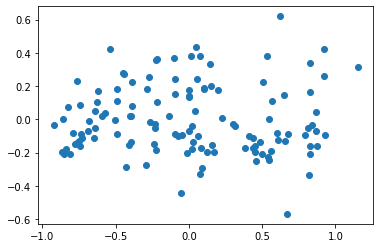

In [94]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
train_x, train_y = (cleaned_featureset.iloc[train])[featureset_keys], (cleaned_featureset.iloc[train])['happiness_score']
components = pca.fit_transform(train_x)

# If we wan to plot where all the countries lie in a PCA
plt.scatter(components[:,0], components[:,1])

### Linear Results
Running the Kernel Ridge model with a 1.2 alpha and using 5 fold cross validation, R^2 averaged at 0.95 plus/minus 0.01 in subsequent runs. The model runs with strong accuracy. The variation is mostly present in the lower happiness scores values. This could be due to less data being available or a lesser weight being placed on the available data that better predicts those values.

## Quadratic model

In [34]:
results = pd.DataFrame(columns=["cross_validation_results"])
def train_model(df, features, alpha=1.0, kernel="linear", gamma=None, degree=None, coef0=None):
    
    # Setup parameters for model
    kr_args = {"kernel": kernel, "alpha": alpha, "gamma": gamma}        
    
    if kernel == "polynomial":
        kr_args["degree"] = degree 
        kr_args["coef0"] = coef0
    
    
    
    # Create and run cross validation
    pred_list = []
    pred_scores = []
    for train, test in RepeatedKFold(n_splits=5, n_repeats=1).split(df):
        
        train_x, train_y = df.iloc[train][features], df.iloc[train]['happiness_score']
        test_x, test_y = df.iloc[test][features], df.iloc[test]['happiness_score']
        
        print(train_x, test_x)
        print(train_y, test_y)
        # Initialise
        kr_model = KernelRidge(**kr_args)
        
        # Train
        fit = kr_model.fit(train_x, train_y)
        
        # Predict 
        prediction = kr_model.predict(test_x)
        pred_list.append(prediction)
        
        # Evaluate
        score = kr_model.score(test_x, test_y)
        print(f"Score for {kernel} model is {score}")
        pred_scores.append(score)
        
    for p in pred_list_quad:
        plt.scatter(test_y, p)
        plt.xlabel('True Values')
        plt.ylabel('Predictions')
        
    print(f'Predicted value average across 5 runs are {sum(pred_val_list_quad)/len(pred_val_list_quad):.4f}')
    

In [35]:
train_model(cleaned_featureset, featureset_keys, "linear")

      economy    family    health   freedom  dystopia_residual  \
2    0.788903  1.000000  0.877172  0.951674           0.709893   
4    0.768850  0.942092  0.851329  0.937353           0.749120   
5    0.801517  0.850441  0.852959  0.886725           0.699705   
7    0.748361  0.948637  0.859383  0.931308           0.609053   
9    0.790950  0.917222  0.888121  0.911946           0.615898   
..        ...       ...       ...       ...                ...   
148  0.120071  0.325361  0.199766  0.518601           0.428680   
150  0.187273  0.452546  0.339920  0.881221           0.059187   
152  0.264318  0.531826  0.380267  0.583009           0.088779   
153  0.037324  0.192422  0.154722  0.069809           0.476392   
154  0.524029  0.659147  0.013993  0.397738           0.616188   

     internet_access_population[%]  cellular_subscriptions  GDP_per_capita[$]  \
2                         1.000000                0.578420           0.830743   
4                         0.890966           

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('<U32') to dtype('float64') with casting rule 'same_kind'

Predicted value average across 5 runs are 0.9632


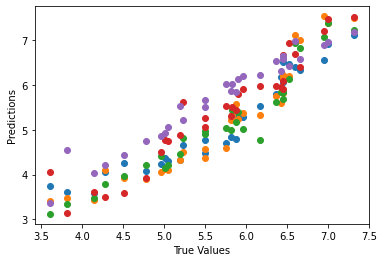

In [15]:
# KERNEL RIDGE POLYNOMIAL REGRESSION

rkf = RepeatedKFold(n_splits=5, n_repeats=1)
pred_list_quad = []
pred_val_list_quad = []
for train, test in rkf.split(cleaned_featureset):
    train_x, train_y = (cleaned_featureset.iloc[train])[featureset_keys],(cleaned_featureset.iloc[train])['happiness_score']
    test_x, test_y = (cleaned_featureset.iloc[test])[featureset_keys], (cleaned_featureset.iloc[test])['happiness_score']
    #Create model
    clf_quad = KernelRidge(alpha=1.0, kernel='polynomial', gamma=1.3, degree=2, coef0=1.3)
    #Build model with training data
    fit_quad = clf_quad.fit(train_x, train_y)
    #now use the model to 
    prediction = clf_quad.predict(test_x)
    pred_list_quad.append(prediction)
    score = clf_quad.score(test_x, test_y)
    pred_val_list_quad.append(score)

for p in pred_list_quad:
    plt.scatter(test_y, p)

plt.xlabel('True Values')
plt.ylabel('Predictions')

print('Predicted value average across 5 runs are {0:.4f}'.format(sum(pred_val_list_quad)/len(pred_val_list_quad)))

### Quadratic Results
The algorithm used the Kernel Ridge polynomial model with alpha of 1.0, gamma of 1.3 and degrees of 2 (quadratic). R^2 across 5 fold cross validation averaged at 0.96 plus/minus 0.01 in subsequent runs. Like the linear model, the highest variance in the prediction occurred in the lower happiness scores. The model overpredicted earlier results initially, however varied between an over and underprediction. It was most accurate, and least varied around the mean and median of the happiness score which makes sense, as that is where most of the data lies.

## Gaussian model

Predicted value average across 5 runs are 0.9639


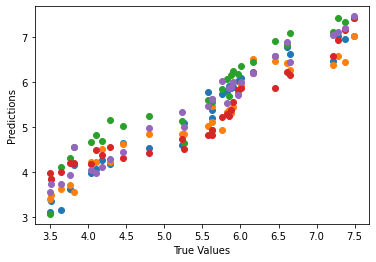

In [16]:
#KERNEL RIDGE GAUSSIAN REGRESSION

rkf_g = RepeatedKFold(n_splits=5, n_repeats=1)
pred_list_g = []
pred_val_list_g = []
for train, test in rkf_g.split(cleaned_featureset):
    train_x, train_y = (cleaned_featureset.iloc[train])[featureset_keys],(cleaned_featureset.iloc[train])['happiness_score']
    test_x, test_y = (cleaned_featureset.iloc[test])[featureset_keys], (cleaned_featureset.iloc[test])['happiness_score']
    #Create model
    clf = KernelRidge(alpha=.01, kernel='rbf', gamma=0.2)
    #Build model with training data
    fit = clf.fit(train_x, train_y)
    #now use the model to 
    p = clf.predict(test_x)
    pred_list_g.append(p)
    s = clf.score(test_x, test_y)
    pred_val_list_g.append(s)

for p in pred_list_g:
    plt.scatter(test_y, p)

plt.xlabel('True Values')
plt.ylabel('Predictions')

print('Predicted value average across 5 runs are {0:.4f}'.format(sum(pred_val_list_g)/len(pred_val_list_g)))

The Gaussian algorithm used the Kernel Ridge radial basis function model with an alpha of 0.01 and gamma of 0.2. The $R^2$ average across 5 fold cross validation was 0.97 plus/minus 0.01. The model was most accurate using the gaussian model, likely because of the pre-processing work to normalize the data. Like the other two models, the highest variance occurred at the lowest happiness scores.

## Comparison

The Gaussian model runs best ouut of the 3. This is likely because I normalized the data during pre-processing. Compared to my colleagues I am disappointed I didn't get a more accurate model however I think that this is within the range of accepatble measures and I would argue that the offset from truth would be because of a better generalization. However it is difficult to justify this model in any real cases due to the lack of quality of the data. I believe that happiness is such a subjective measure that any organisation building data on such a topic can only result in failure. I therefore urge anyone reading this report to be careful when referencing. I also urge the reader to seek other literature as there are bodies of longitudinal studies that challenge the null hypothesis that certain factors such as GDP are positively related to happiness. Whilst saying this, I would like to articulate that this opinion is outside of the scope of this report.